In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join(os.getcwd(), '../data', 'faces_train_data.csv')
df = pd.read_csv(data_path, delimiter = ',')

In [3]:
def CalculateEntropy(attribute):
    length = len(attribute)
    if length <= 1:
        return 0
    
    counts = np.bincount(attribute)
    probs = counts[np.nonzero(counts)] / length
    classes = len(probs)
    if classes <= 1:
        return 0

    return np.sum(-probs * np.log2(probs))

In [4]:
CalculateEntropy(df['smiling'])

0.9994708218806826

In [5]:
no_smile = df.loc[df['smiling'] == 0].index.tolist()
use1 = df['x48'].reindex(index = no_smile)

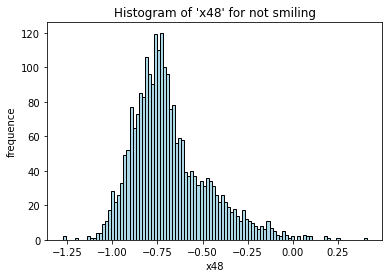

In [6]:
plt.hist(x = use1, bins = 100, color = 'lightblue', edgecolor = 'black')
plt.xlabel('x48')
plt.ylabel('frequence')
plt.title('Histogram of \'x48\' for not smiling')
plt.show()

In [7]:
smile = df.loc[df['smiling'] == 1].index.tolist()
use2 = df['x48'].reindex(index = smile)

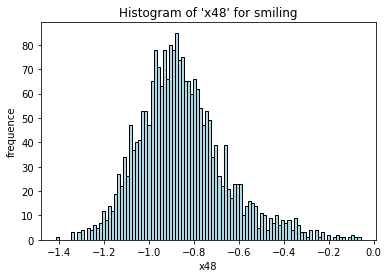

In [8]:
plt.hist(x = use2 , bins = 100, color = 'lightblue', edgecolor = 'black')
plt.xlabel('x48')
plt.ylabel('frequence')
plt.title('Histogram of \'x48\' for smiling')
plt.show()

In [9]:
right = df[df['x48'] > -0.7]
r_smile = right.loc[df['smiling'] == 1].index.tolist()
r1 = right['x48'].reindex(index = r_smile)

r_nosmile = right.loc[df['smiling'] == 0].index.tolist()
r0 = right['x48'].reindex(index = r_nosmile)

print(r1.shape)
print(r0.shape)

(413,)
(1071,)


In [10]:
left = df[df['x48'] <= -0.7]
l_smile = left.loc[df['smiling'] == 1].index.tolist()
l1 = left['x48'].reindex(index = l_smile)

l_nosmile = left.loc[df['smiling'] == 0].index.tolist()
l0 = left['x48'].reindex(index = l_nosmile)

print(l1.shape)
print(l0.shape)

(1922,)
(1394,)


In [11]:
def entropy(num1, num2, total):
    pro1 = num1/total
    pro2 = num2/total

    return (-pro1 * np.log2(pro1))+(-pro2 * np.log2(pro2))  

In [12]:
h1 = entropy(len(use1), len(use2), 4800)
h2 = entropy(len(r0),len(r1), len(right))
h3 = entropy(len(l0),len(l1), len(left))
h = h1 - (len(right)/4800)*h2 - (len(left)/4800)*h3
h

0.057567551465329436